In [96]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
data=load_breast_cancer()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['target']=data.target

In [98]:
df.dropna(inplace=True)

x=df.drop('target',axis=1)
y=df['target']

In [99]:
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [101]:
svm_model=SVC(kernel='linear',random_state=42)
svm_model.fit(x_train,y_train)


SVC(kernel='linear', random_state=42)

In [102]:
y_pred=svm_model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

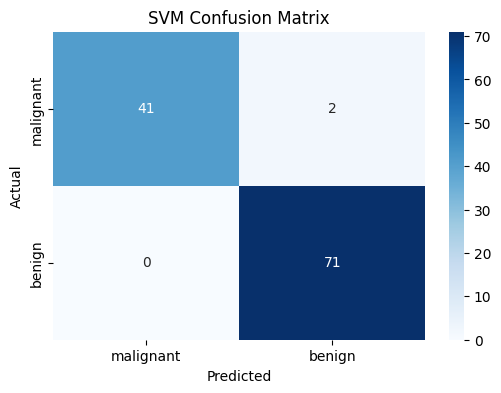

In [103]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [104]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_acc = accuracy_score(y_test, log_reg.predict(x_test))

print(f"SVM Accuracy: {accuracy:.4f}")
print(f"Logistic Regression Accuracy: {log_acc:.4f}")


SVM Accuracy: 0.9825
Logistic Regression Accuracy: 0.9825
